In [4]:
import numpy as np
import pandas as pd
from source.moreka import AxonData
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


In [5]:
data = AxonData(dirname='../data')
df = data[1].iloc[::50, :]

# Calculate the moving average with a window size of 10
window_size = 10
df['smoothed_signal'] = df['signal'].rolling(window=window_size, min_periods=1).mean()

In [6]:
# Calculate the absolute differences between consecutive signal values
df['distance'] = abs(df['smoothed_signal'].diff().fillna(0))

# Calculate the cumulative sum in the 'time' column
df['distance'] = df['distance'].cumsum()

# Display the modified DataFrame
print(df)


In [7]:
# plot df
df.plot(x='distance', y='smoothed_signal', kind='scatter', alpha=0.3, s=5)

<Axes: xlabel='distance', ylabel='smoothed_signal'>

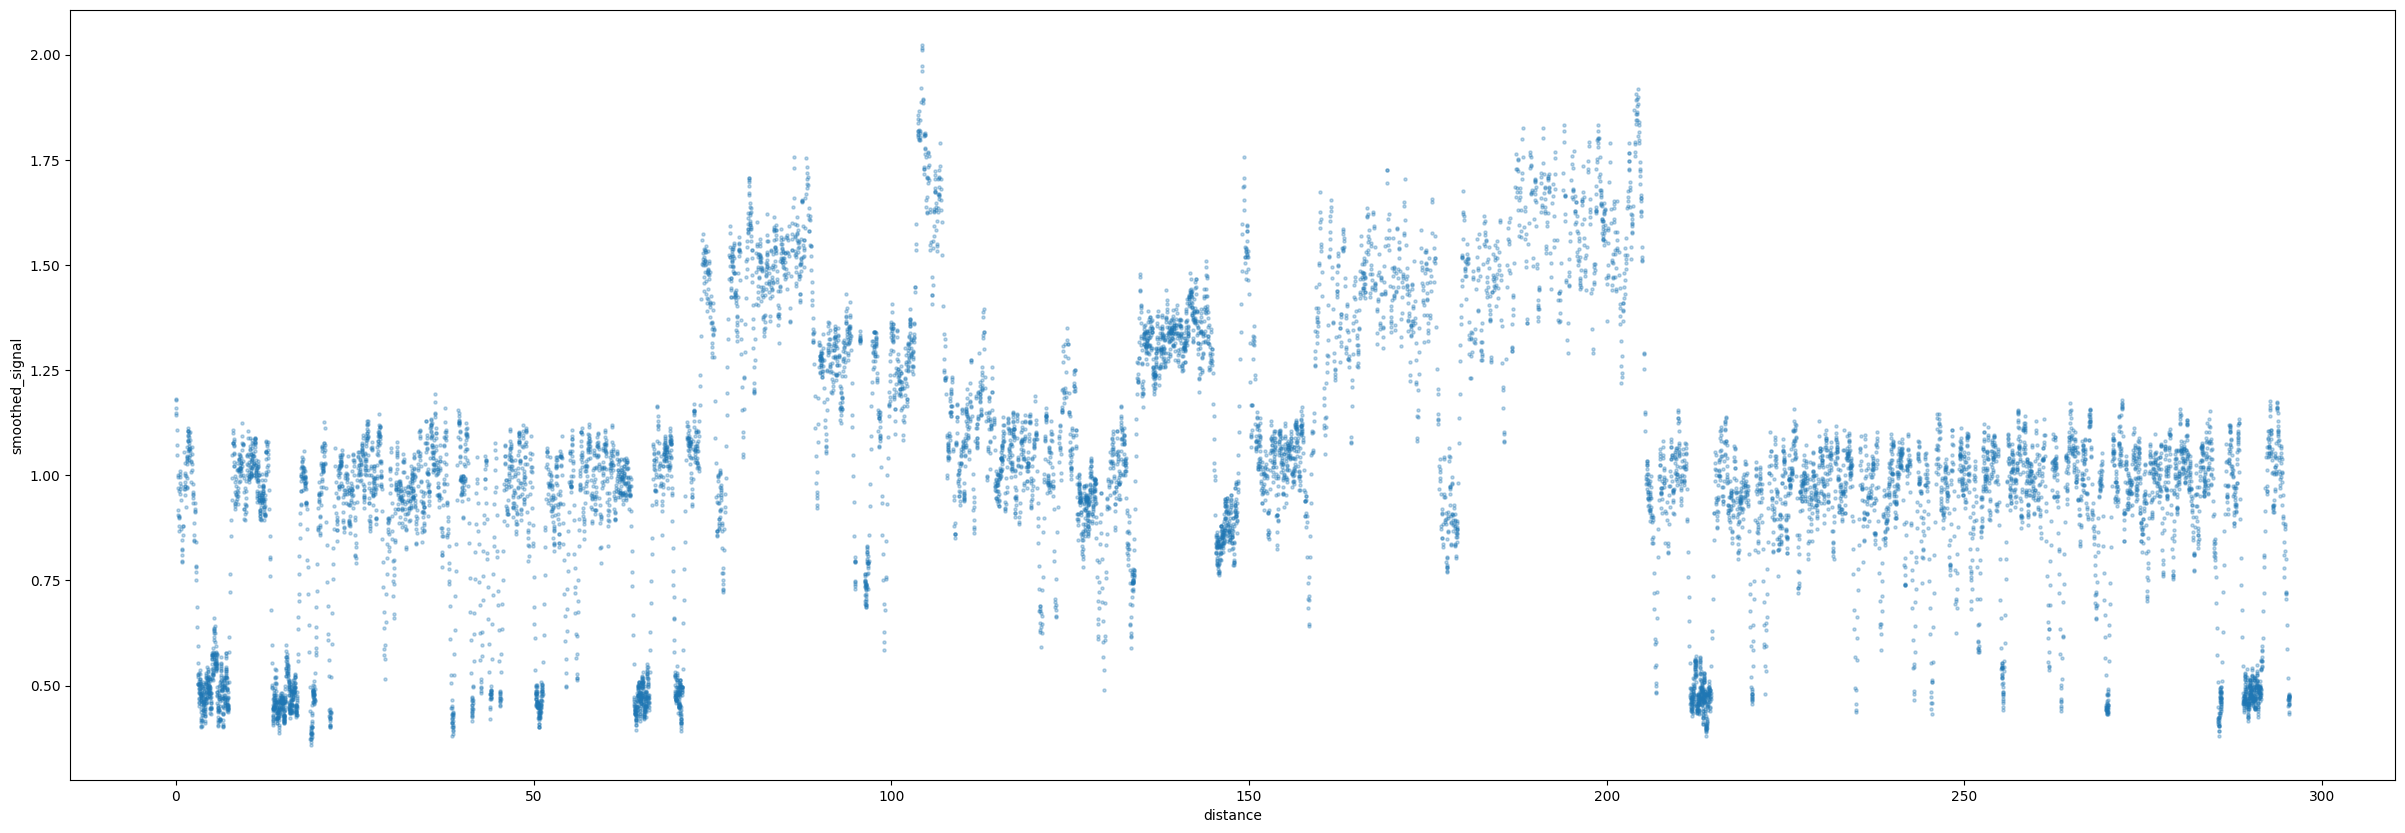

In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [9]:
# # Compute the distance matrix
# distance_matrix = squareform(pdist(df[['distance', 'smoothed_signal']]))
#
# # Sort the distances to visualize them
# sorted_distances = np.sort(distance_matrix, axis=None)


In [10]:
# # Plot the sorted distances
# plt.plot(sorted_distances)
# plt.xlabel('Index')
# plt.ylabel('Distance')
# plt.title('Sorted Distances')
# plt.show()


Text(0.5, 0, 'Projection of the cluster means onto the y-axis')

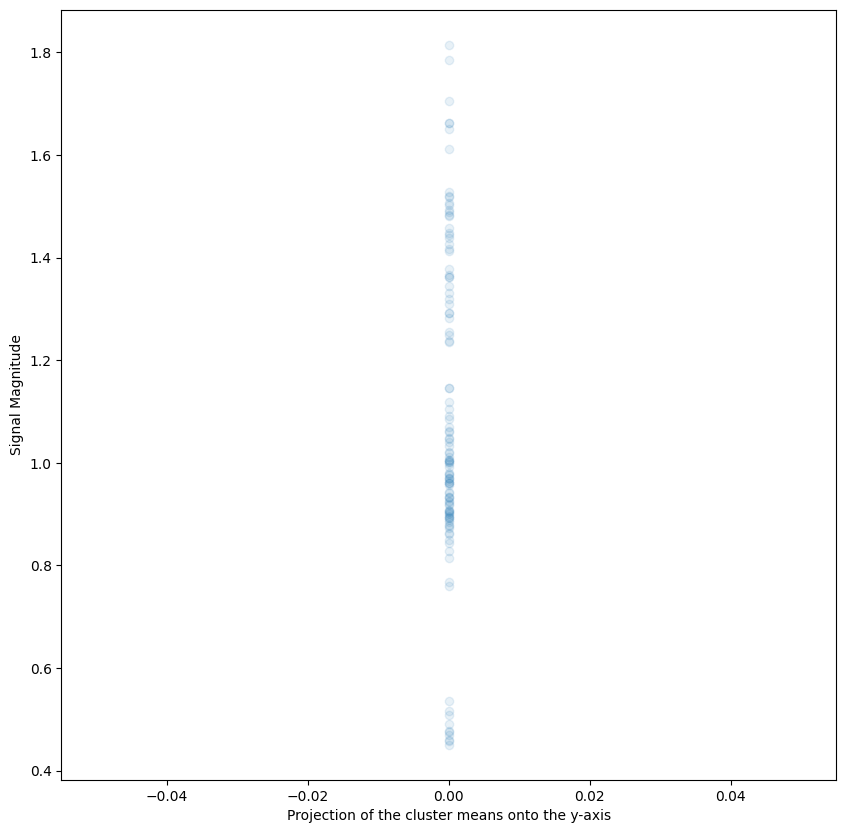

In [11]:
# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=5)  # You can adjust eps and min_samples based on your data
labels = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
df['cluster'] = labels

df

In [373]:
# remove datapoints with cluster -1
df = df[df['cluster'] != -1]
# calculate the mean of each cluster
cluster_means = df.groupby('cluster')['smoothed_signal'].mean()
cluster_means = pd.DataFrame(cluster_means)
cluster_means = cluster_means.reset_index()

plt.scatter(cluster_means['smoothed_signal'], cluster_means['smoothed_signal'], alpha=0.1)

,time,signal,smoothed_signal,distance,cluster
50,0.005,0.410156,0.491943,0.081787,0
100,0.010,0.524902,0.502930,0.092773,0
150,0.015,0.411682,0.480118,0.115585,0
200,0.020,0.429077,0.469910,0.125793,0
250,0.025,0.428467,0.463003,0.132701,0
...,...,...,...,...,...
599200,59.920,0.670471,0.473541,249.742437,130
599250,59.925,0.398254,0.457520,249.758458,130
599850,59.985,0.398865,0.471344,250.355718,130
599900,59.990,0.721130,0.482574,250.366948,130


In [12]:
df

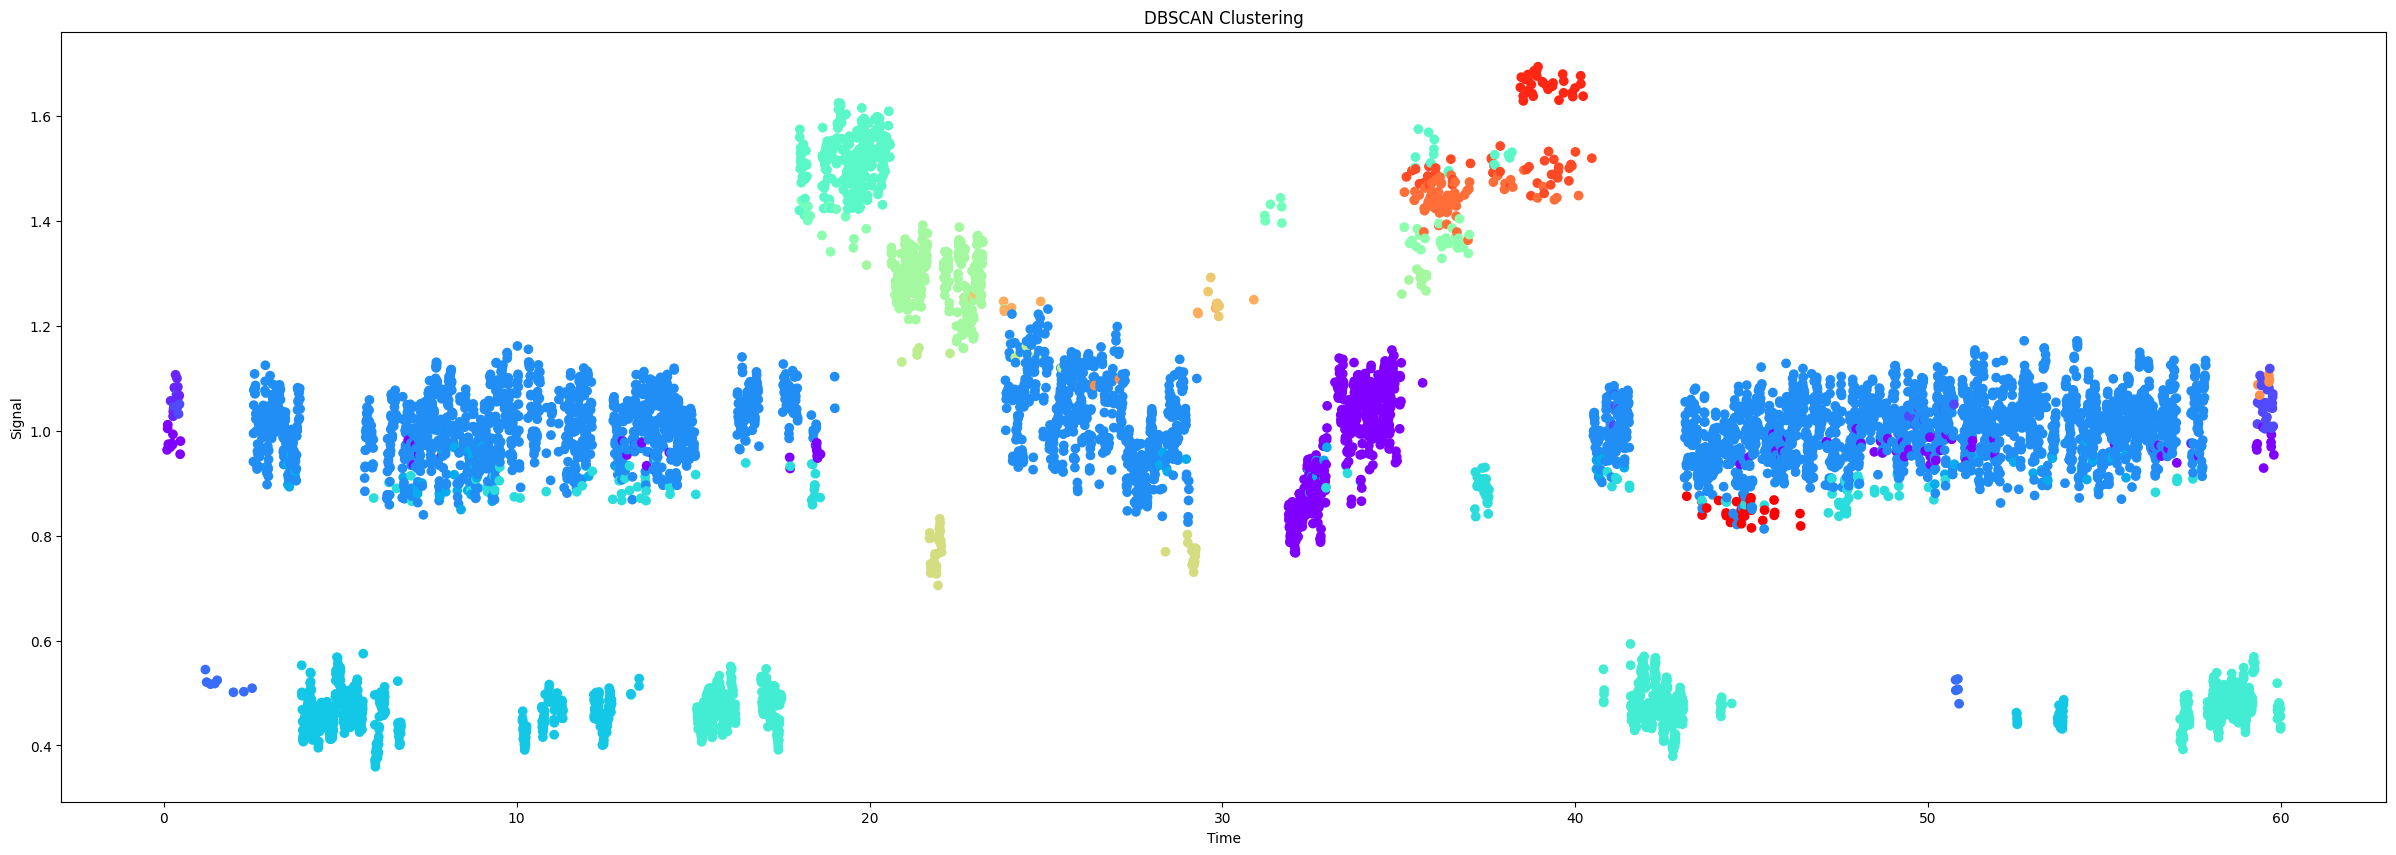

In [13]:
# Apply DBSCAN to cluster_means
dbscan = DBSCAN(eps=.03, min_samples=2)  # You can adjust eps and min_samples based on your data
labels = dbscan.fit_predict(cluster_means.smoothed_signal.values.reshape(-1, 1))

new_cluster = []
# db['cluster'] = value of the index of the label in labels
for cluster in df.cluster:
    try:
        new_cluster.append(labels[cluster])
    except Exception as e:
        print(e)
        new_cluster.append(-1)
len(new_cluster)

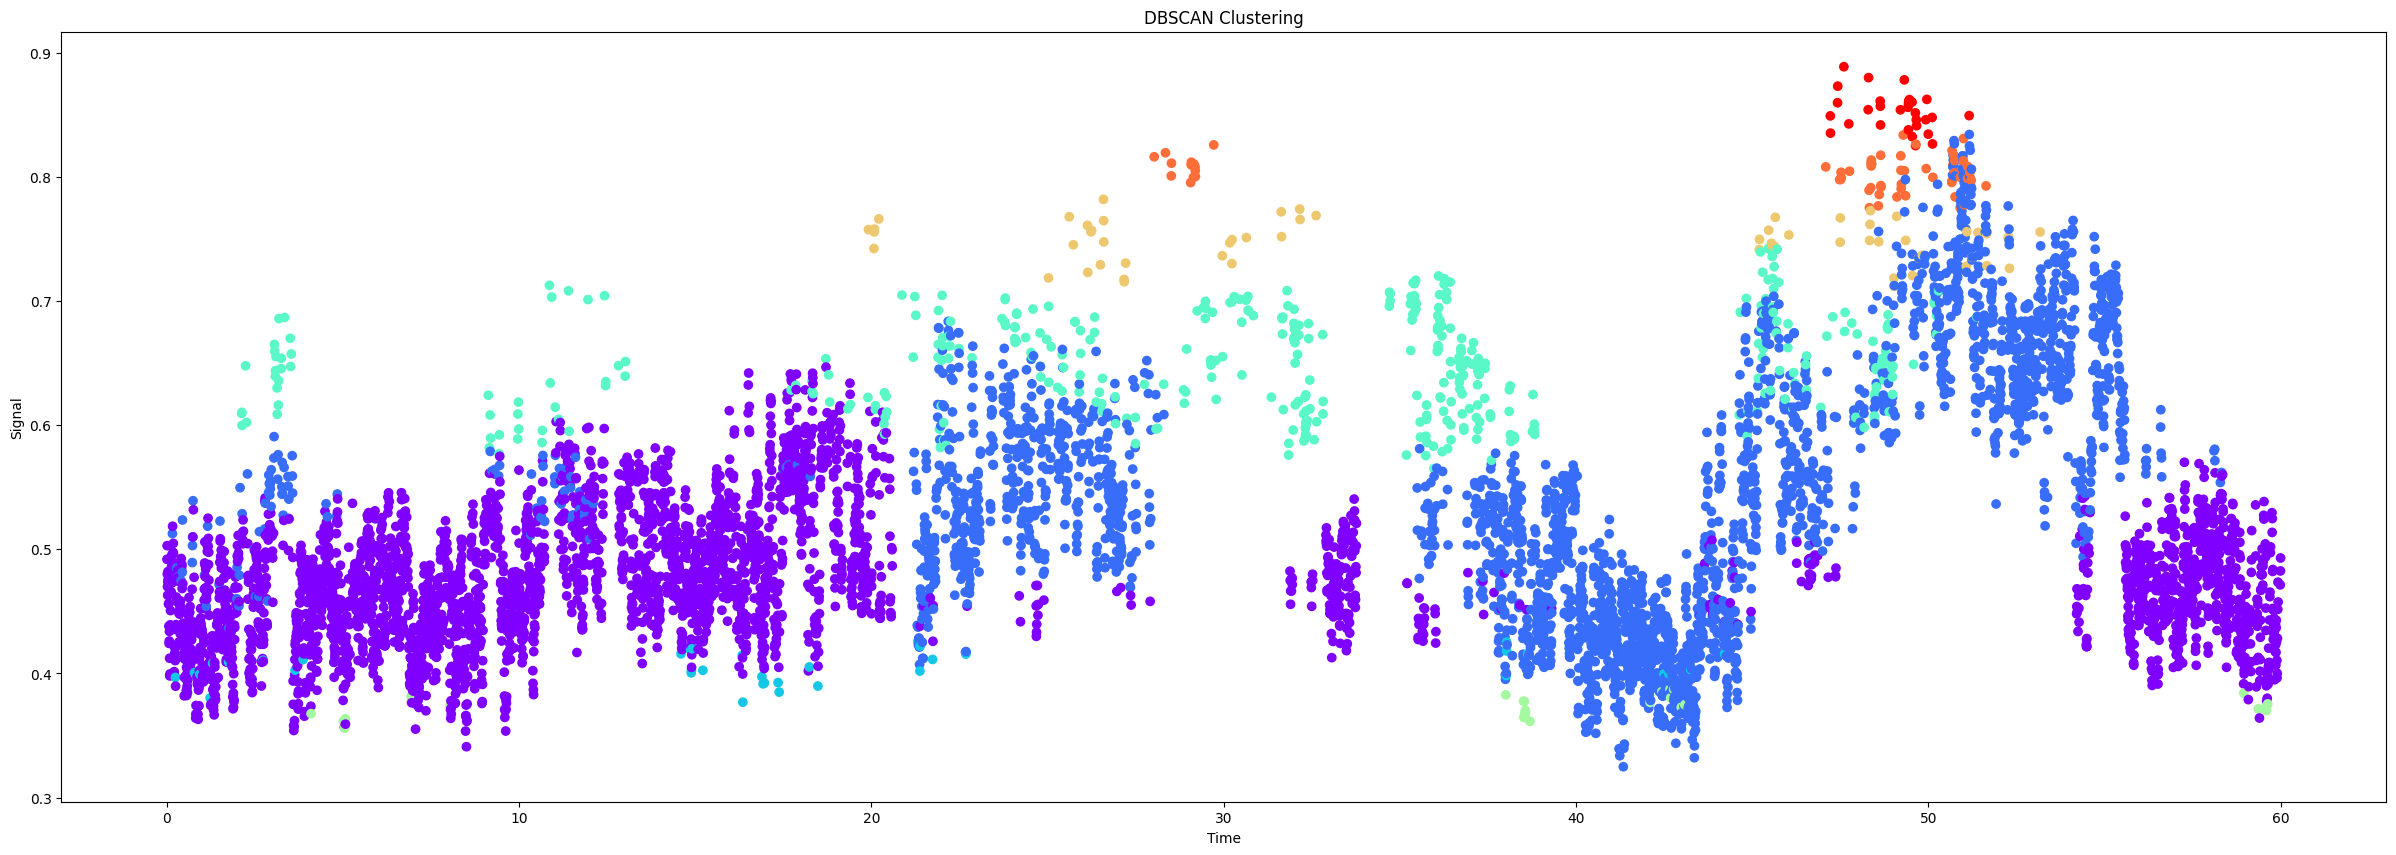

In [387]:
df['new_cluster'] = new_cluster
df

In [247]:
# Plot the clusters

# Filter out points with cluster -1
filtered_df = df[df['new_cluster'] != -1]

plt.figure(figsize=(30, 10))
plt.scatter(filtered_df['time'], filtered_df['smoothed_signal'], c=filtered_df['new_cluster'], cmap='rainbow', alpha=1)

# Add cluster labels next to each point for the first 100 points
# for index, row in filtered_df.iloc[0:500].iterrows():
#     plt.text(row['time'], row['smoothed_signal'], str(int(row['cluster'])), color='black')


plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('DBSCAN Clustering')
# plt.xlim(30, 40)
plt.show()


,time,signal,smoothed_signal,distance,cluster,new_cluster
50,0.005,0.410156,0.491943,0.081787,0,0
100,0.010,0.524902,0.502930,0.092773,0,0
150,0.015,0.411682,0.480118,0.115585,0,0
200,0.020,0.429077,0.469910,0.125793,0,0
250,0.025,0.428467,0.463003,0.132701,0,0
...,...,...,...,...,...,...
599200,59.920,0.670471,0.473541,249.742437,130,0
599250,59.925,0.398254,0.457520,249.758458,130,0
599850,59.985,0.398865,0.471344,250.355718,130,0
599900,59.990,0.721130,0.482574,250.366948,130,0


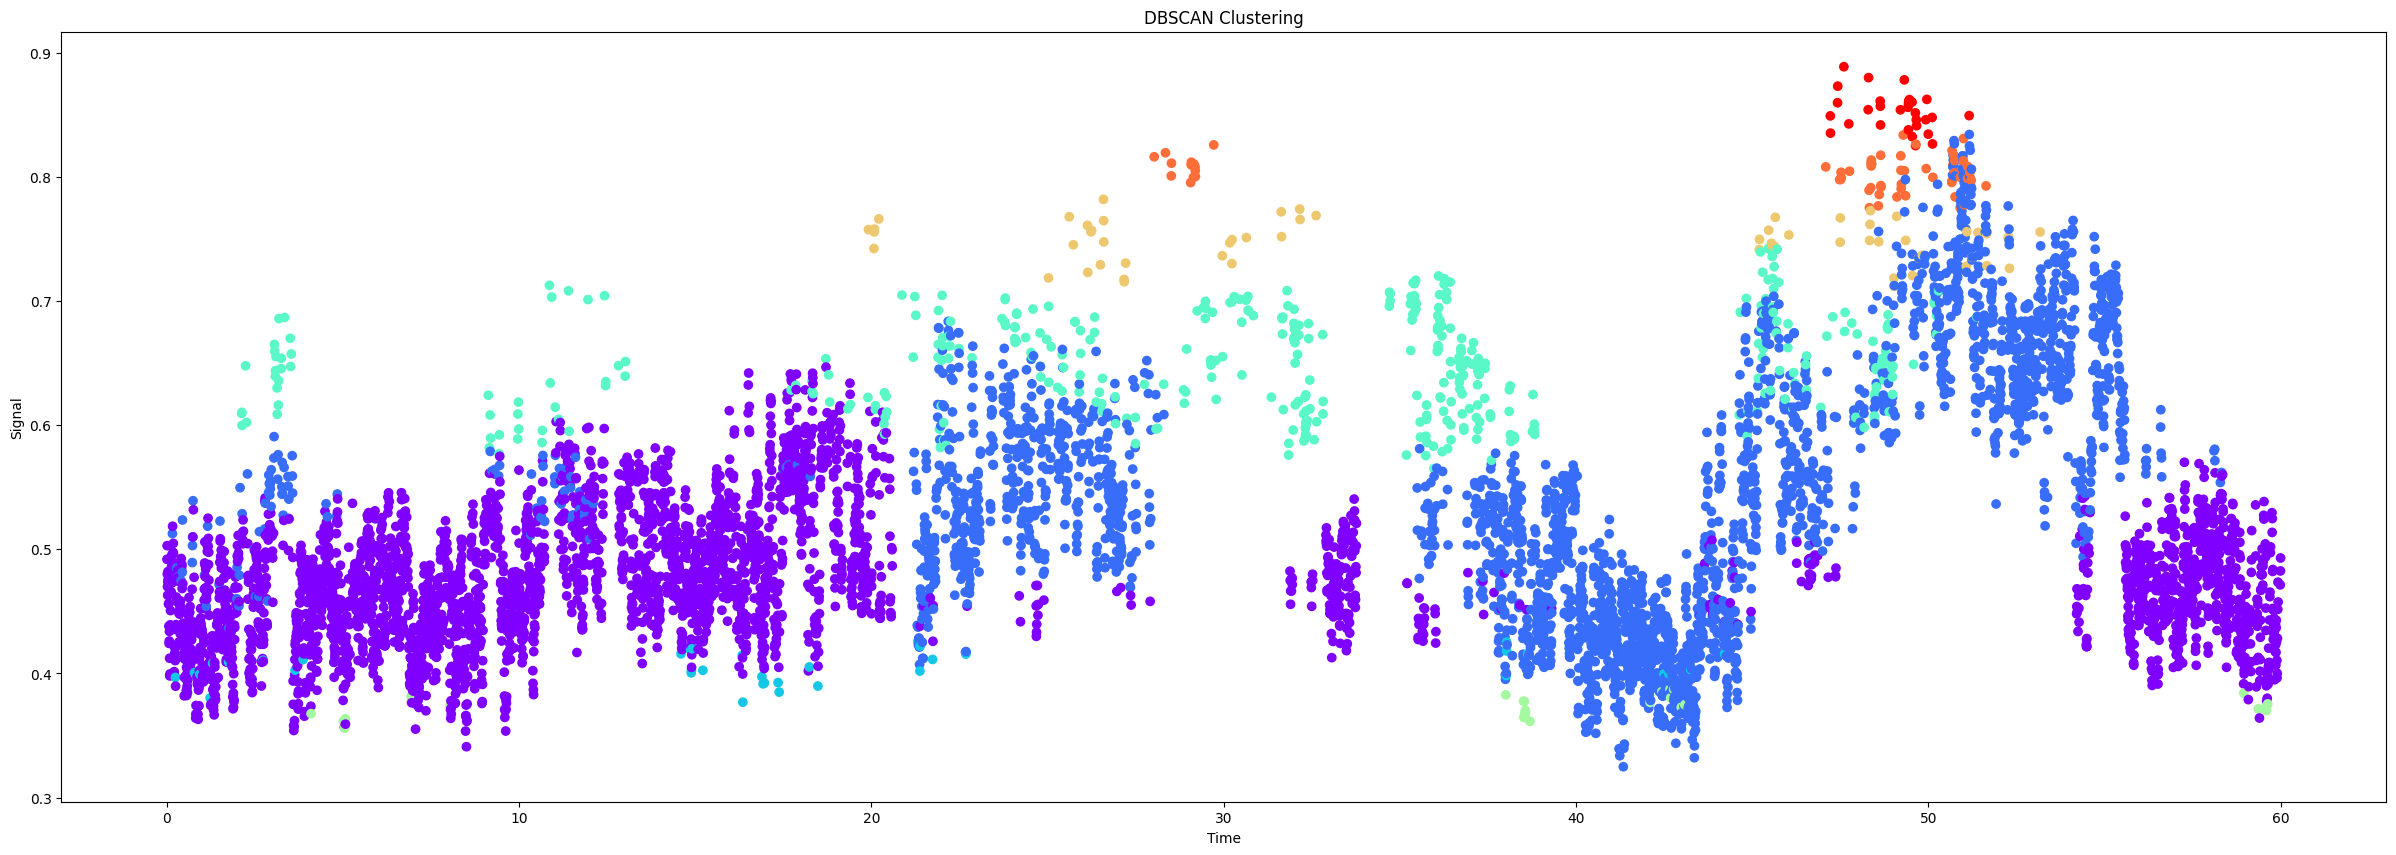